In [82]:
from MyScene import MyScene
from DataCFG import DataCFG
import numpy as np
import matplotlib.pyplot as plt
import sionna.rt as rt

In [79]:
# create data config and scene
data_cfg = DataCFG(rt.scene.etoile)
scene = MyScene(data_cfg.scene_name[0])

In [75]:
import random

def rand_on_square_border(xmin, xmax, ymin, ymax, rng=random):
    """Uniform on the border of an axis-aligned rectangle/square."""
    w = xmax - xmin
    h = ymax - ymin
    perim = 2*(w + h)
    t = rng.random() * perim

    if t < w:                              # bottom edge: (xmin → xmax, y=ymin)
        x = xmin + t
        y = ymin
    elif t < w + h:                        # right edge: (ymin → ymax, x=xmax)
        x = xmax
        y = ymin + (t - w)
    elif t < 2*w + h:                      # top edge: (xmax → xmin, y=ymax)
        x = xmax - (t - (w + h))
        y = ymax
    else:                                  # left edge: (ymax → ymin, x=xmin)
        x = xmin
        y = ymax - (t - (2*w + h))
    return x, y

In [76]:
def random_tx_position(obj, margin=1.5):
    max_pos = obj.mi_mesh.bbox().max
    min_pos = obj.mi_mesh.bbox().min

    xmax, ymax = max_pos[0] + margin, max_pos[1] + margin
    xmin, ymin = min_pos[0] - margin, min_pos[1] - margin
    x, y = rand_on_square_border(xmin, xmax, ymin, ymax)
    
    z = max_pos[2] + margin
    return np.array([x, y, z])

In [77]:
def get_valid_objects(scene, min_height=15):
    valid_objects = []
    for obj_name, obj in scene.objects.items():

        if obj_name in ['ground', 'Plane', 'floor']:
            continue

        if hasattr(obj, 'mi_mesh'):
            if obj.mi_mesh.bbox().max[2] > min_height:
                valid_objects.append(obj_name)
                
    return valid_objects

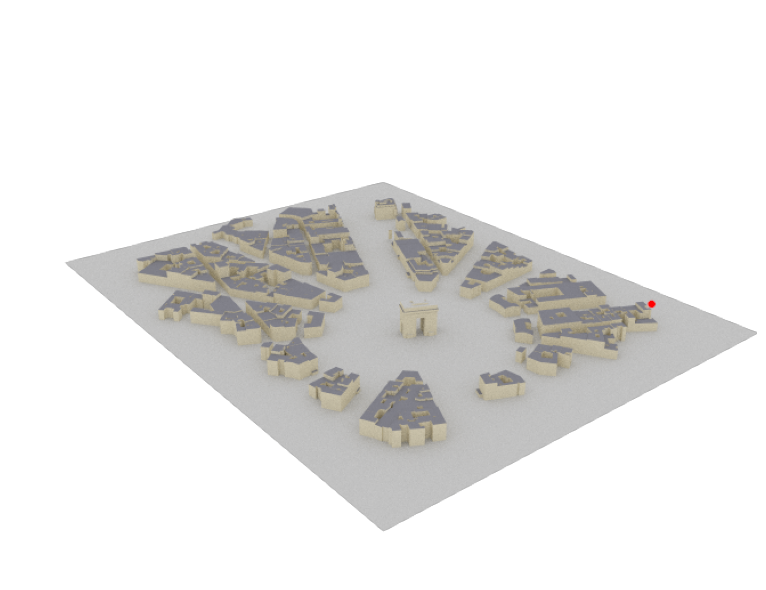

c:\Users\marwi\Desktop\RaySR\RaySR\.venv\Lib\site-packages\drjit\ast.py:838: RuntimeWarning: The AST-transforming decorator @drjit.syntax was called more than 1000 times by your program. Since transforming and recompiling Python code is a relatively expensive operation, it should not be used within loops or subroutines. Please move the function to be transformed to the top program level and decorate it there.
  warnings.warn(


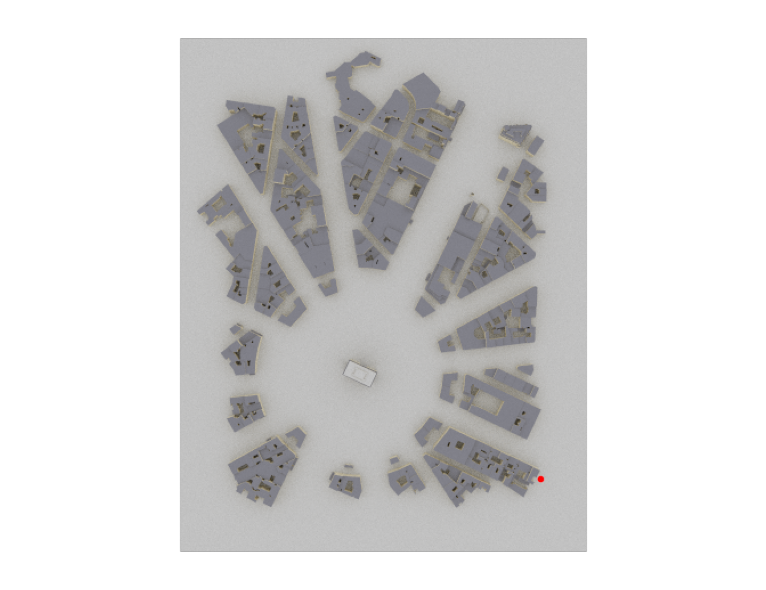

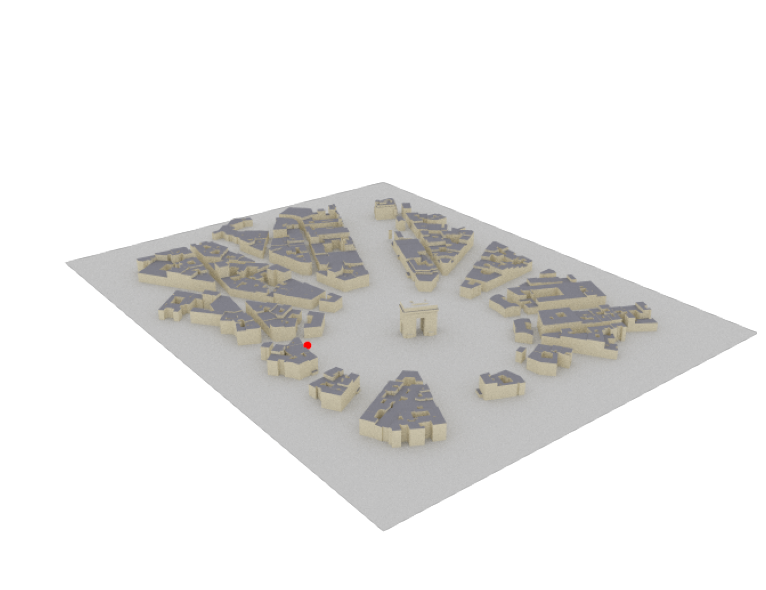

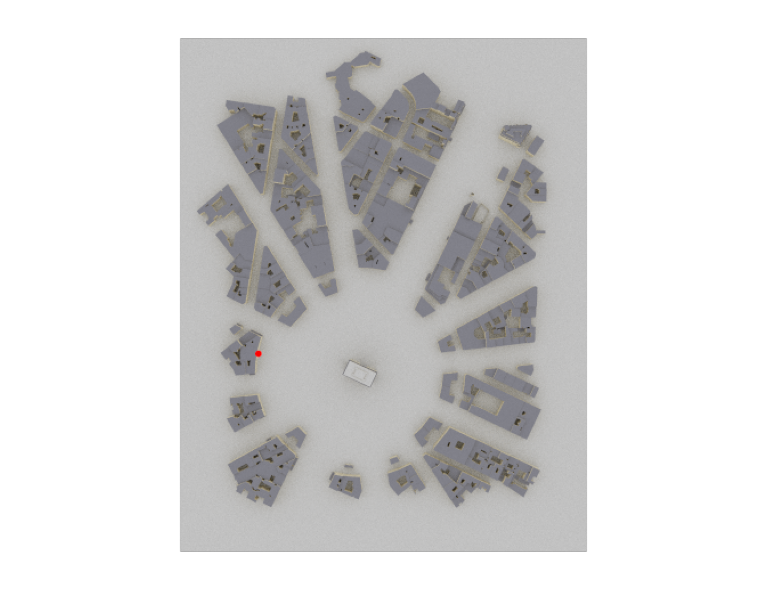

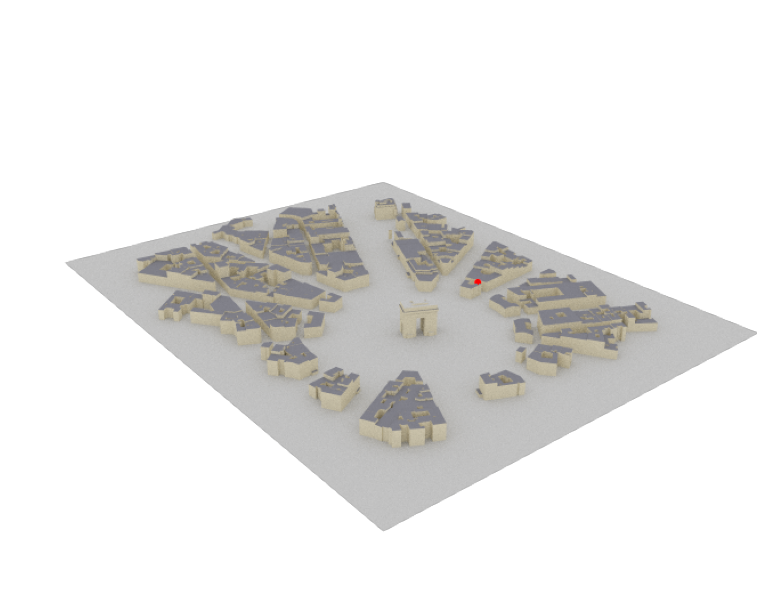

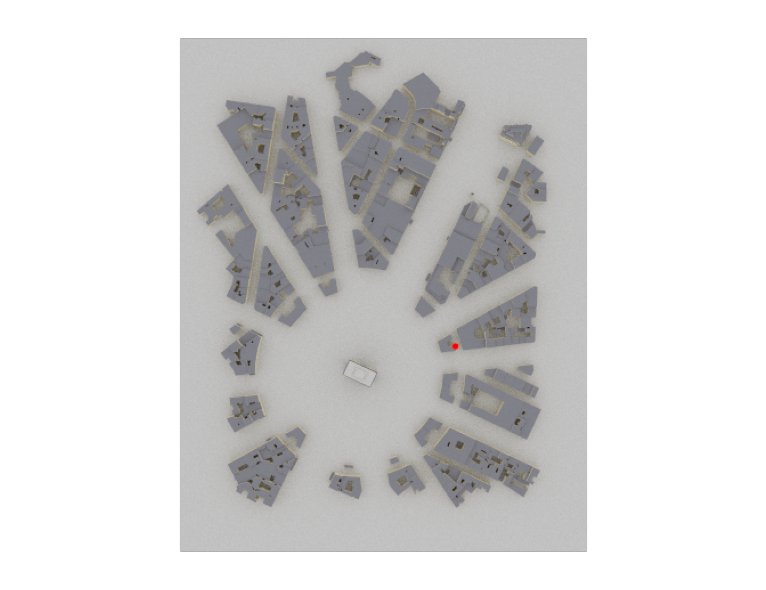

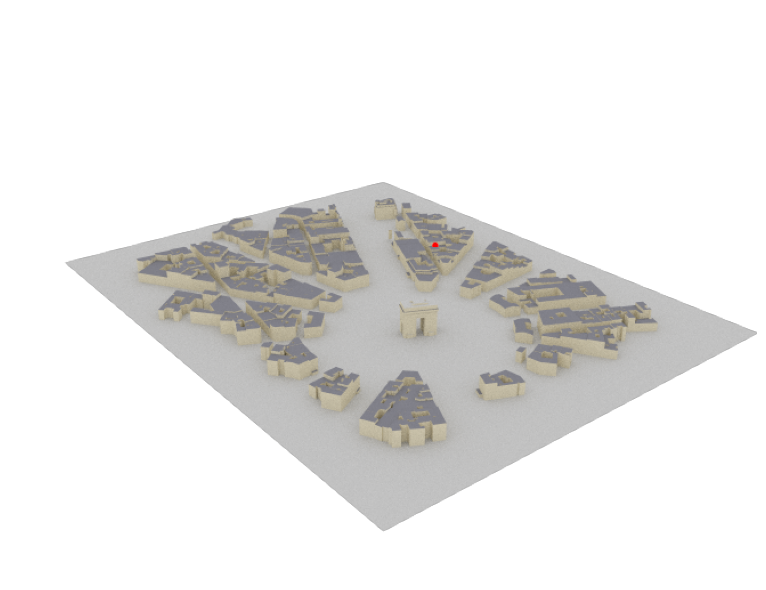

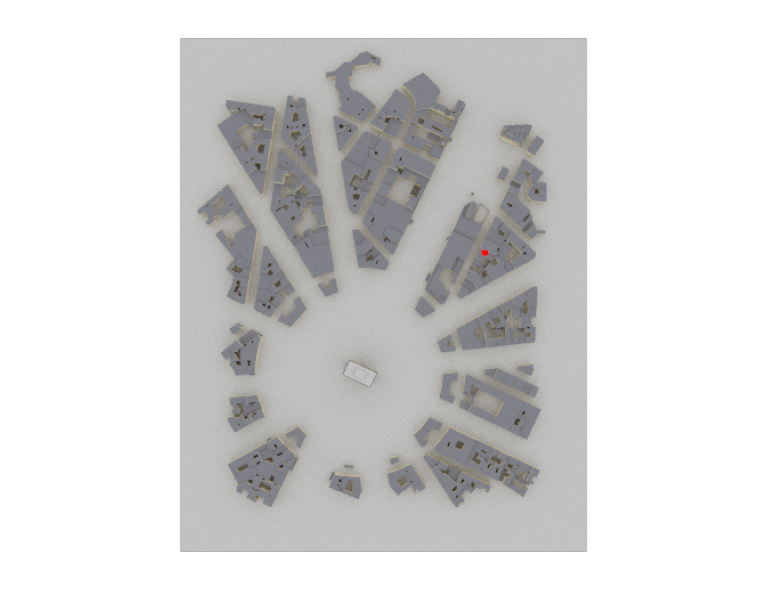

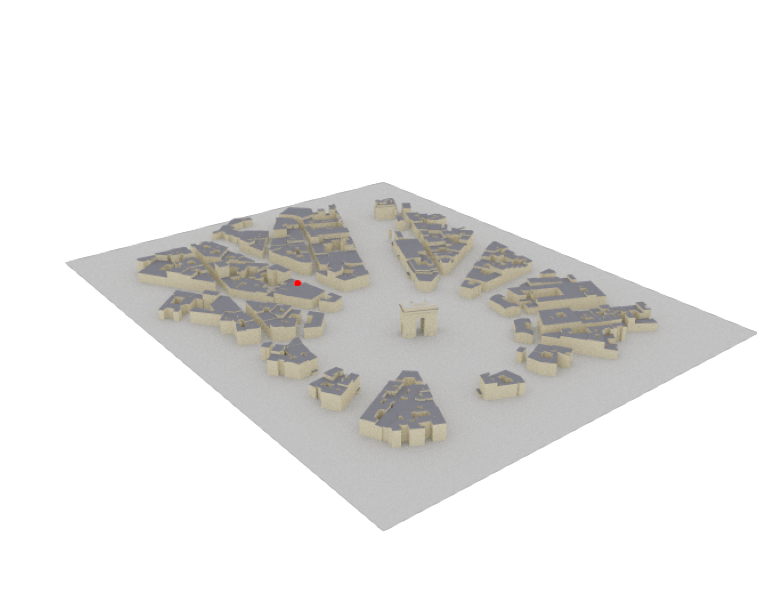

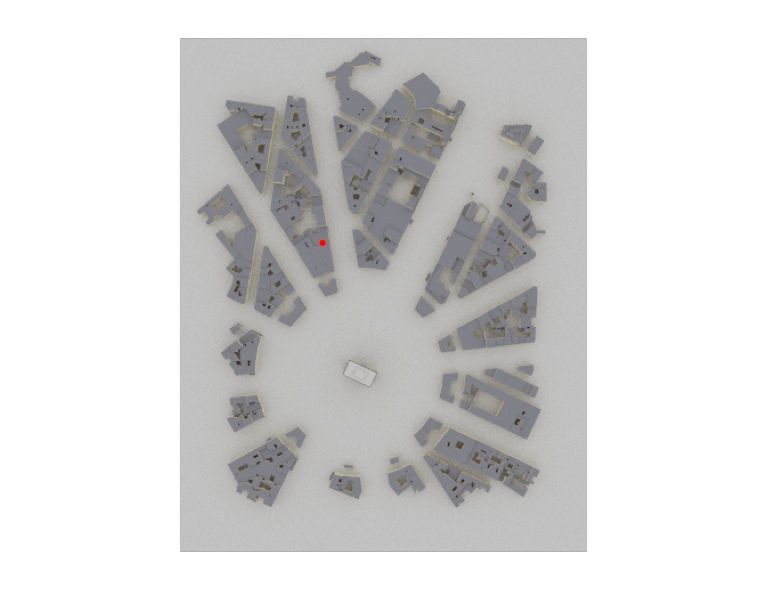

In [ ]:
k = 5   # number of samples per scene
margin = 1

valid_object_names = get_valid_objects(scene, min_height=15)
pairs = random.sample(
    [(name, scene.objects[name]) for name in valid_object_names],
    k=k
    )

for key, obj in pairs:
    tx_pos = random_tx_position(obj, margin=margin)

    scene.remove('tx')  # remove existing tx if any
    tx = rt.Transmitter(
        name='tx', 
        position=tx_pos
        )
    
    scene.add(tx)
    scene.render(camera=scene.diag_camera)
    plt.show()
    scene.render(camera=scene.top_down_camera)
    plt.show()

    user_input = input("Press Enter to continue...")
    if user_input.lower() == 'q':
        break